<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project". As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
# <span style=" color:red">Tasks
</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
#any plots generated will be displayed within the notebook itself

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df_bike = pd.read_csv("store_sharing.csv")
# if the dataset is not in the same folder, we cannot read the dataset by simply writing the name of the dataset,
# instead we must write the path along with the name of the dataset.
df_bike.head(5)
# humidity is in percentage: it represents the relative amount of moisture present in the air compared to the 
# maximum amount of moisture the air can hold at a particular temperature.

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [3]:
df_bike.info()
# the data type of timestamp must be date_time, we can convert it by pd.to_datetime if needed be.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df_bike.describe().T 
# statistical definition to gain insight into the distribution of data and to get visualization ideas

count         mean          std   min    25%    50%      75%  \
cnt           17414.0  1143.101642  1085.108068   0.0  257.0  844.0  1671.75   
t1            17414.0    12.468091     5.571818  -1.5    8.0   12.5    16.00   
t2            17414.0    11.520836     6.615145  -6.0    6.0   12.5    16.00   
hum           17414.0    72.324954    14.313186  20.5   63.0   74.5    83.00   
wind_speed    17414.0    15.913063     7.894570   0.0   10.0   15.0    20.50   
weather_code  17414.0     2.722752     2.341163   1.0    1.0    2.0     3.00   
is_holiday    17414.0     0.022051     0.146854   0.0    0.0    0.0     0.00   
is_weekend    17414.0     0.285403     0.451619   0.0    0.0    0.0     1.00   
season        17414.0     1.492075     1.118911   0.0    0.0    1.0     2.00   

                 max  
cnt           7860.0  
t1              34.0  
t2              34.0  
hum            100.0  
wind_speed      56.5  
weather_code    26.0  
is_holiday       1.0  
is_weekend       1.0  
season           3.0

In [5]:
missing_values = df_bike.isnull().sum() # there is no missing value
missing_values

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<Axes: >

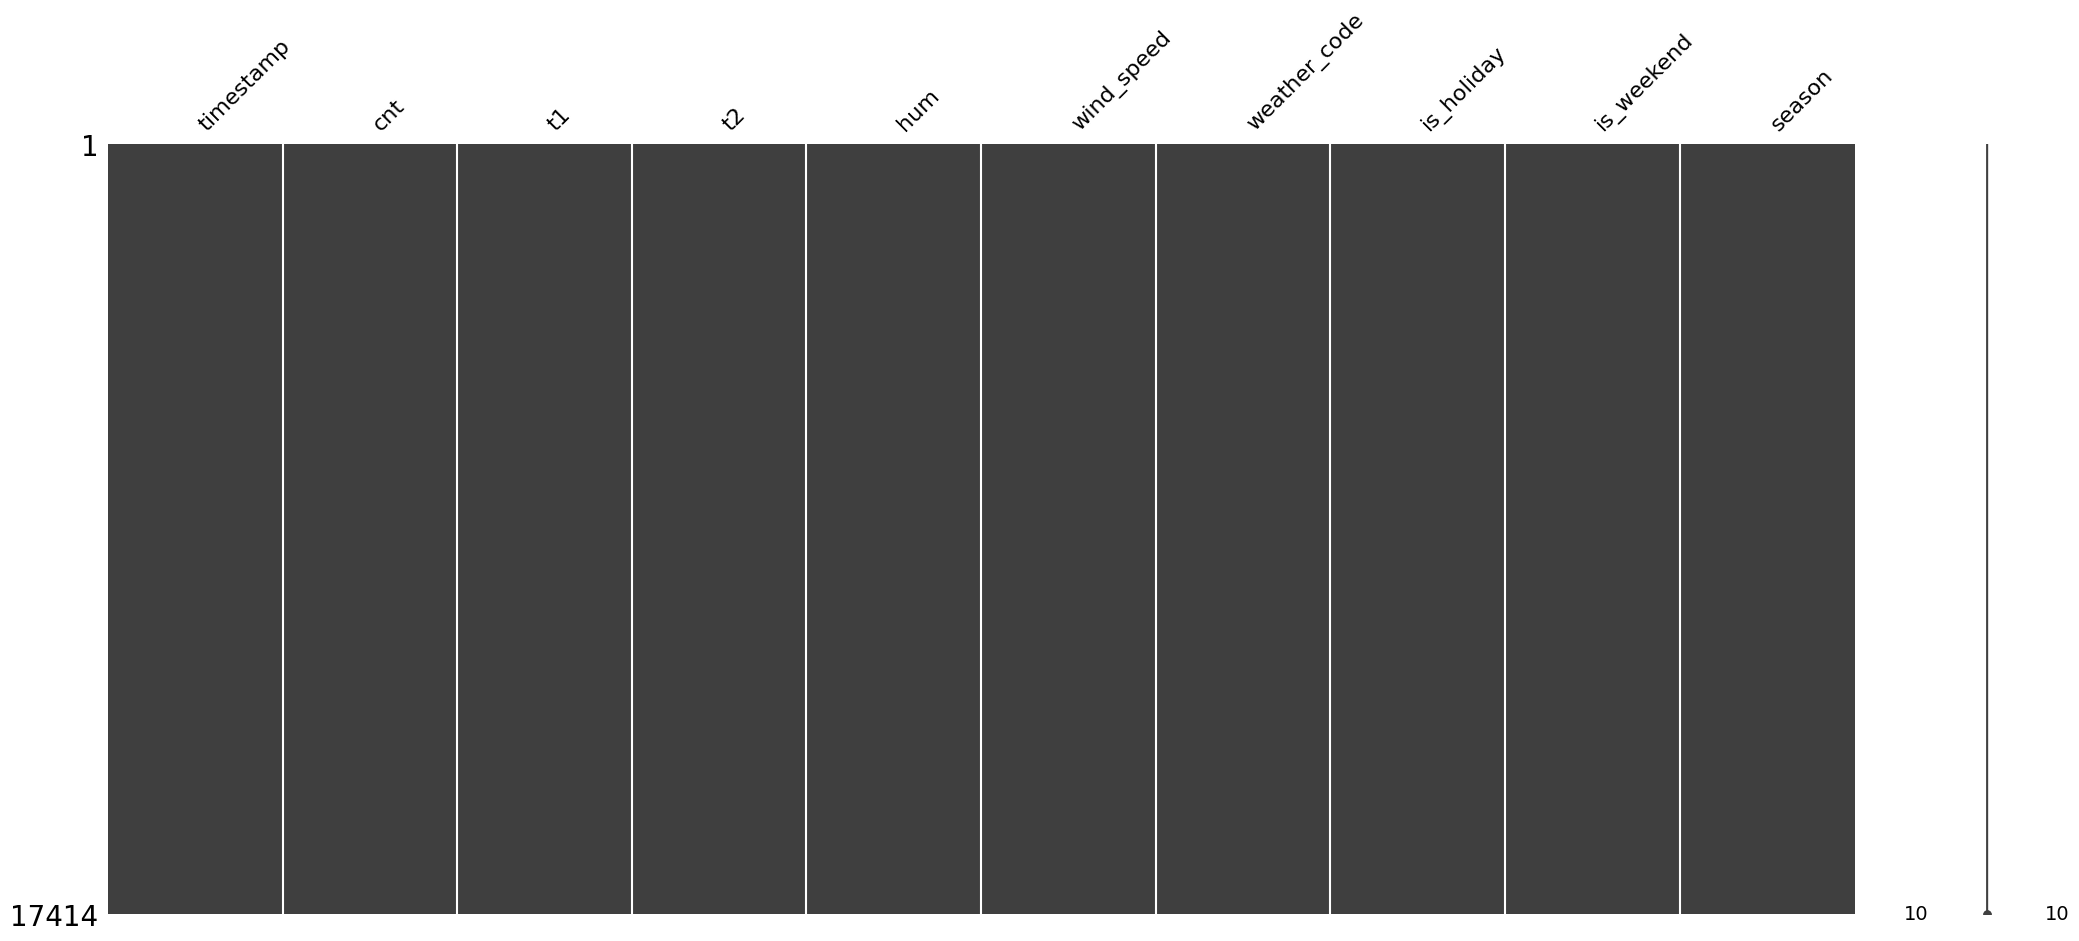

In [6]:
import missingno as msno # there is no missing value
msno.matrix(df_bike)

In [7]:
missing_values.isna().sum()[missing_values.isna().sum() > 0]

array([], dtype=int64)

In [8]:
duplicate_rows = df_bike.duplicated() # there is no duplicate lines
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [10]:
# df_bike.drop_duplicates(keep='last', inplace=True) - Keep the last occurrence of each duplicated row
# df_bike.drop_duplicates(inplace=True) - We can drop the duplicated rows.
# df_bike.reset_index(drop=True, inplace=True) - After removing duplicated rows, the index may have gaps. 

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [11]:

# Season
df_bike['season'].replace(1.0, 'Summer', inplace=True)
df_bike['season'].replace(2.0, 'Fall', inplace=True)
df_bike['season'].replace(3.0, 'Winter', inplace=True)
df_bike['season'].replace(0.0, 'Spring', inplace=True)

# Is Holiday
df_bike['is_holiday'].replace(1.0, 'Holiday', inplace=True)
df_bike['is_holiday'].replace(0.0, 'Non-holiday', inplace=True)

# Is Weekend
df_bike['is_weekend'].replace(1.0, 'Weekend', inplace=True)
df_bike['is_weekend'].replace(0.0, 'Non-weekend', inplace=True)

# Weather Code
df_bike['weather_code'].replace(1.0, 'Clear', inplace=True)
df_bike['weather_code'].replace(2.0, 'scattered clouds', inplace=True)
df_bike['weather_code'].replace(3.0, 'Broken clouds', inplace=True)
df_bike['weather_code'].replace(4.0, 'Cloudy', inplace=True)
df_bike['weather_code'].replace(7.0, 'Rain', inplace=True)
df_bike['weather_code'].replace(10.0, 'rain with thunderstorm', inplace=True)
df_bike['weather_code'].replace(26.0, 'snowfall', inplace=True)
df_bike['weather_code'].replace(94.0, 'Freezing Fog', inplace=True)

selected_columns = ['weather_code', 'is_holiday', 'is_weekend', 'season']
df_selected = df_bike[selected_columns]
df_selected.head(5)

weather_code   is_holiday is_weekend  season
0  Broken clouds  Non-holiday    Weekend  Winter
1          Clear  Non-holiday    Weekend  Winter
2          Clear  Non-holiday    Weekend  Winter
3          Clear  Non-holiday    Weekend  Winter
4          Clear  Non-holiday    Weekend  Winter

In [12]:
df_bike.head(5)

timestamp  cnt   t1   t2    hum  wind_speed   weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0  Broken clouds   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0          Clear   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0          Clear   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0          Clear   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5          Clear   

    is_holiday is_weekend  season  
0  Non-holiday    Weekend  Winter  
1  Non-holiday    Weekend  Winter  
2  Non-holiday    Weekend  Winter  
3  Non-holiday    Weekend  Winter  
4  Non-holiday    Weekend  Winter

In [13]:
new_df_bike = pd.DataFrame({'date': df_bike['timestamp'], 'count': df_bike['cnt']})
new_df_bike

date  count
0      2015-01-04 00:00:00    182
1      2015-01-04 01:00:00    138
2      2015-01-04 02:00:00    134
3      2015-01-04 03:00:00     72
4      2015-01-04 04:00:00     47
...                    ...    ...
17409  2017-01-03 19:00:00   1042
17410  2017-01-03 20:00:00    541
17411  2017-01-03 21:00:00    337
17412  2017-01-03 22:00:00    224
17413  2017-01-03 23:00:00    139

[17414 rows x 2 columns]

In [14]:
new_df_bike['date'] = pd.to_datetime(new_df_bike['date'])

# Extract day information and assign it to the "timestamp" column
new_df_bike['date'] = new_df_bike['date'].dt.day_name()

In [15]:
new_df_bike_days = new_df_bike.groupby('date')['count'].count()
new_df_bike_days

date
Friday       2450
Monday       2508
Saturday     2465
Sunday       2505
Thursday     2492
Tuesday      2505
Wednesday    2489
Name: count, dtype: int64

In [16]:
new_df_bike.head(1)

date  count
0  Sunday    182

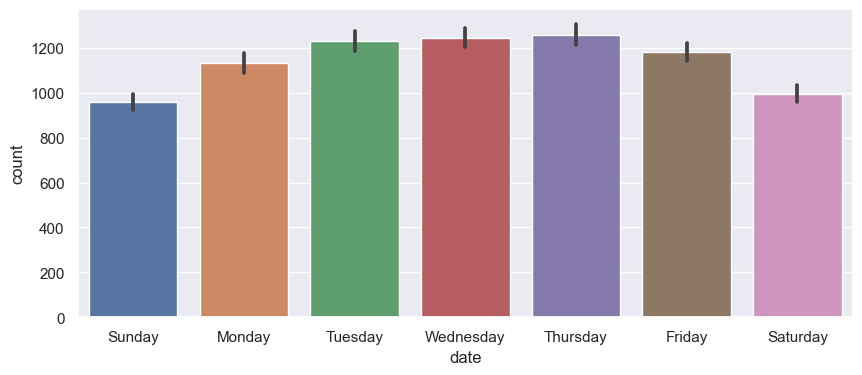

In [17]:
# Setting the plot size
sns.set(rc={'figure.figsize':(10, 4)})
sns.barplot(x='date',y='count', data=new_df_bike);

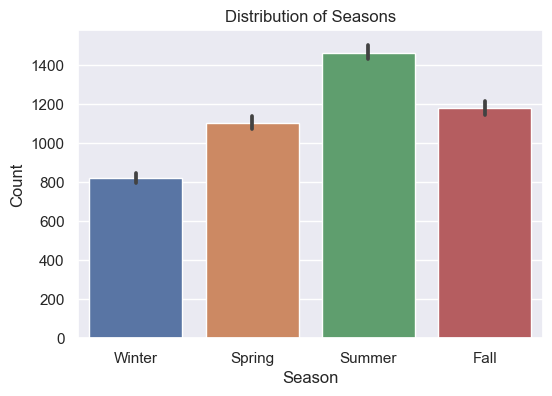

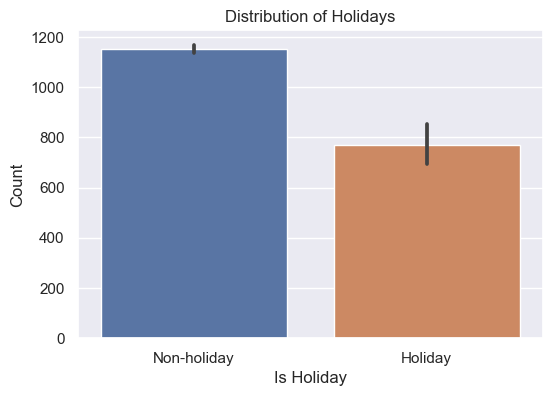

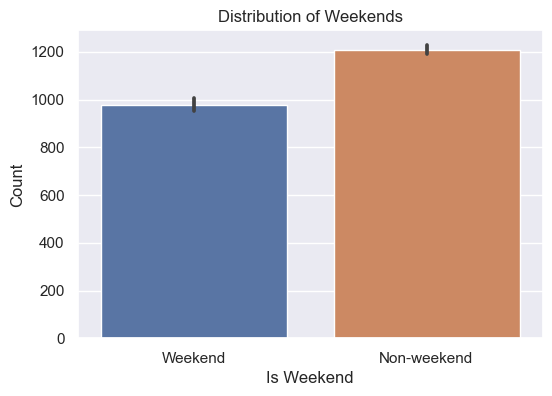

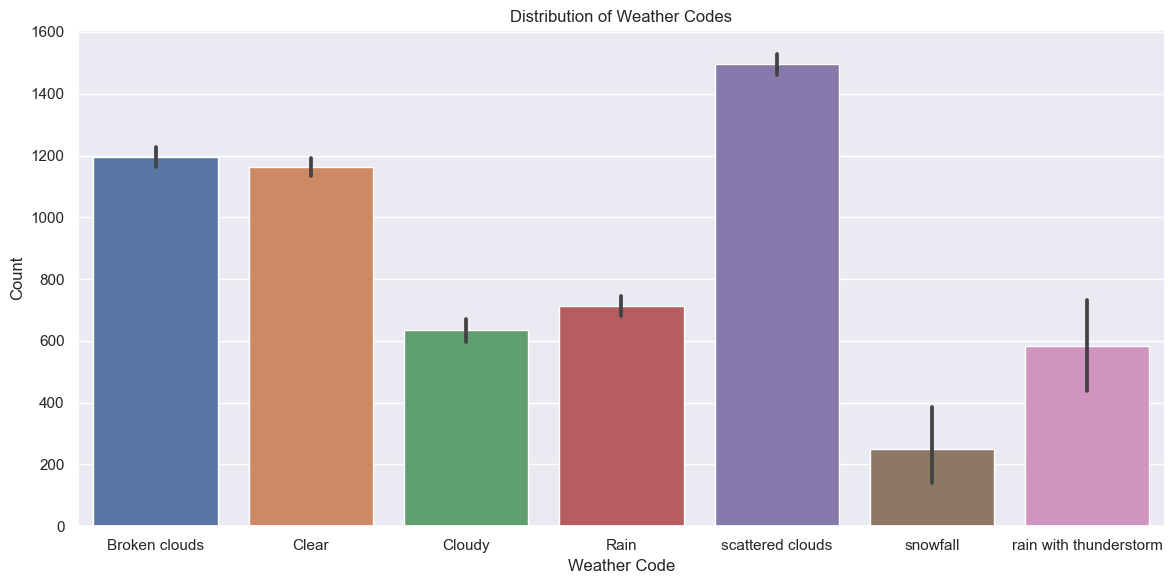

In [18]:
# Setting the plot size
sns.set(rc={'figure.figsize':(6, 4)})

# Season
sns.barplot(x='season',y='cnt', data=df_bike)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Is Holiday
sns.barplot(x='is_holiday',y='cnt', data=df_bike)
plt.title('Distribution of Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.show()

# Is Weekend
sns.barplot(x='is_weekend',y='cnt', data=df_bike)
plt.title('Distribution of Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()

# Weather Code

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='weather_code',y='cnt', data=df_bike)
ax.set_title('Distribution of Weather Codes')
ax.set_xlabel('Weather Code')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.countplot(x='weather_code',data=df_bike)

# weather_code
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
* 2 = scattered clouds / few clouds
* 3 = Broken clouds
* 4 = Cloudy
* 7 = Rain/ light Rain shower/ Light rain
* 10 = rain with thunderstorm
* 26 = snowfall
* 94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [19]:
# Check the data types of each variable
print(df_bike.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday       object
is_weekend       object
season           object
dtype: object


In [20]:
# Transform "timestamp" to datetime type
df_bike['timestamp'] = pd.to_datetime(df_bike['timestamp'])

# Set "timestamp" as the index
df_bike.set_index('timestamp', inplace=True)

In [21]:
df_bike.index.name = 'timestamp'

In [22]:
df_bike.tail(1)

cnt   t1   t2   hum  wind_speed      weather_code  \
timestamp                                                                
2017-01-03 23:00:00  139  5.0  1.0  76.0        22.0  scattered clouds   

                      is_holiday   is_weekend  season  
timestamp                                              
2017-01-03 23:00:00  Non-holiday  Non-weekend  Winter

<div class="alert alert-warning alert-info">
<span style=" color:red">Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

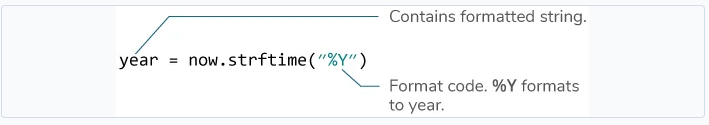

What is Feature Engineering?
- Creating new Features(Columns or Fields)
- Handling missing values
- Feature selection
- Feature modification
- and more https://www.heavy.ai/technical-glossary/feature-engineering#:~:text=Feature%20engineering%20refers%20to%20the,machine%20learning%20or%20statistical%20modeling.

In [23]:
df_bike.head(1)

cnt   t1   t2   hum  wind_speed   weather_code   is_holiday  \
timestamp                                                                 
2015-01-04  182  3.0  2.0  93.0         6.0  Broken clouds  Non-holiday   

           is_weekend  season  
timestamp                      
2015-01-04    Weekend  Winter

In [24]:
df_bike.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [25]:
df_bike['year'] = df_bike.index.strftime("%Y") # df1["year"] = df1.index.year

In [26]:
df_bike.head(1)

cnt   t1   t2   hum  wind_speed   weather_code   is_holiday  \
timestamp                                                                 
2015-01-04  182  3.0  2.0  93.0         6.0  Broken clouds  Non-holiday   

           is_weekend  season  year  
timestamp                            
2015-01-04    Weekend  Winter  2015

* https://www.freecodecamp.org/news/strftime-in-python/

In [27]:
# Extract day of the week
df_bike['day_of_week'] = df_bike.index.dayofweek # df_bike['dayofweek'] = df_bike.index.strftime("%A")

# Extract day of the month
df_bike['day_of_month'] = df_bike.index.day # df_bike['day'] = df_bike.index.strftime("%d")

# Extract hour
df_bike['hour'] = df_bike.index.hour # df_bike['hour'] = df_bike.index.strftime("%H")

# Extract month
df_bike['month'] = df_bike.index.month # df_bike['month'] = df_bike.index.strftime("%m")

# Extract season
df_bike['season'] = df_bike.index.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Extract year
df_bike['year'] = df_bike.index.year # df_bike['year'] = df_bike.index.strftime("%Y")

In [28]:
df_bike.head(1)

cnt   t1   t2   hum  wind_speed   weather_code   is_holiday  \
timestamp                                                                 
2015-01-04  182  3.0  2.0  93.0         6.0  Broken clouds  Non-holiday   

           is_weekend  season  year  day_of_week  day_of_month  hour  month  
timestamp                                                                    
2015-01-04    Weekend  Winter  2015            6             4     0      1

<div class="alert alert-warning alert-info">
<span style=" color:red">Visualize the correlation with a heatmap
</span>

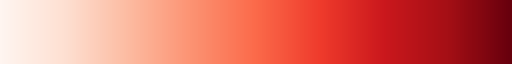

In [29]:
sns.color_palette("Reds", as_cmap = True)

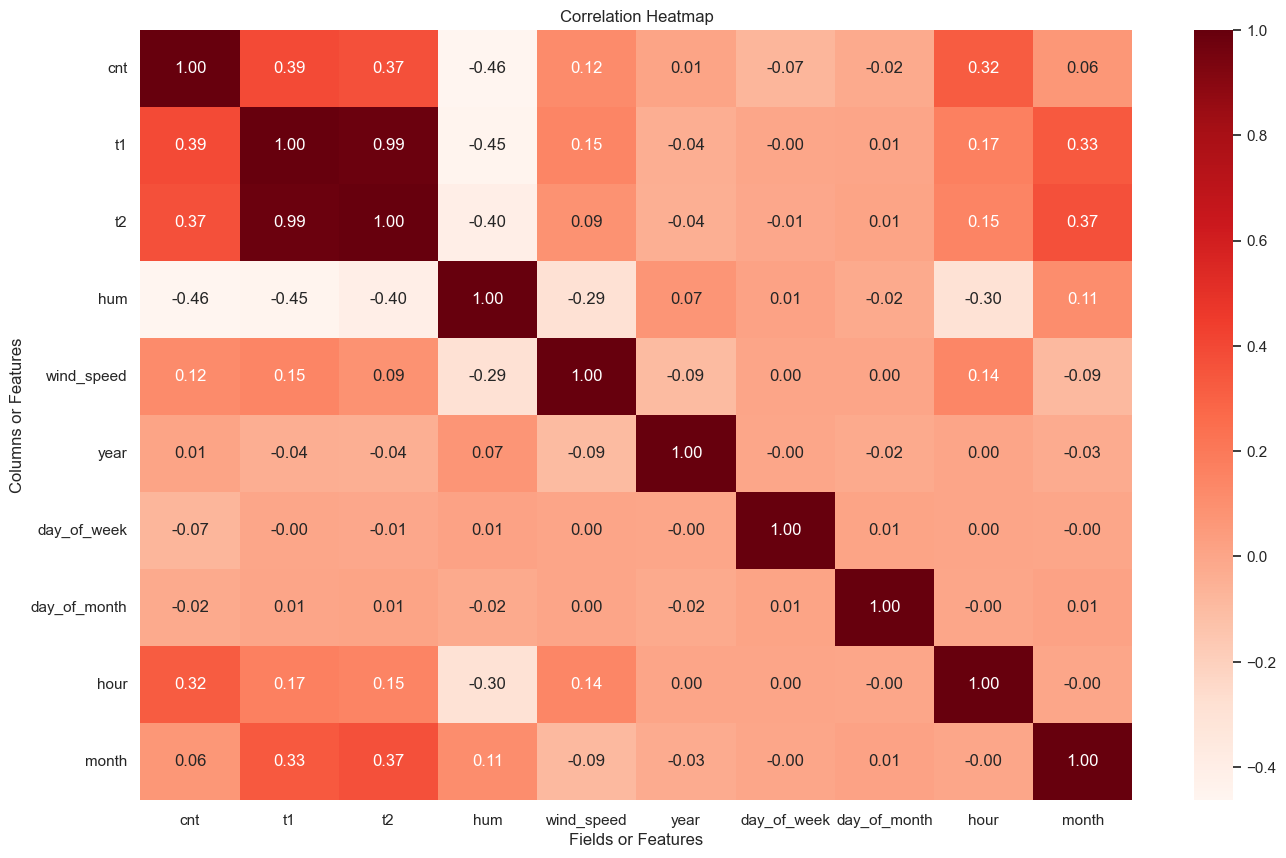

In [30]:
# Compute the correlation matrix
correlation_matrix = df_bike.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", fmt=".2f")

# Customize the plot
plt.title("Correlation Heatmap")
plt.xlabel("Fields or Features")
plt.ylabel("Columns or Features")
plt.xticks(rotation=0)

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">Visualize the correlation of the target variable and the other features with barplot
</span>

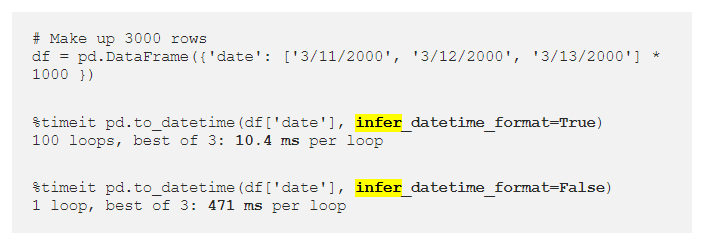

In [31]:
# Create a date range with 3000 rows
dates = pd.date_range('3/11/2000', periods=3000, freq='D')

# Create the DataFrame with the timestamp column
df_timestamp = pd.DataFrame({'timestamp': dates})

# Convert the timestamp column to datetime
%timeit df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'], infer_datetime_format=True)

# Output:
# 100 loops, best of 3: 10.4 ms per loop

%timeit df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'], infer_datetime_format=False)

# Output:
# 1 loop, best of 3: 471 ms per loop

1.79 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.82 ms ± 64.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
df_bike.head(1)

In [ ]:
df_bike.corr()
# Correlation, in simple terms, refers to a statistical measure that helps us understand the relationship between two variables. 
# It tells us how closely related or connected those variables are.

In [32]:
# Select only the numeric columns for correlation calculation
numeric_columns = df_bike.select_dtypes(include='number')
numeric_columns

cnt   t1   t2    hum  wind_speed  year  day_of_week  \
timestamp                                                                   
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0  2015            6   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0  2015            6   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0  2015            6   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0  2015            6   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5  2015            6   
...                   ...  ...  ...    ...         ...   ...          ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0  2017            1   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0  2017            1   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0  2017            1   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0  2017            1   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0  2017            1   

                     day_of_month  hour  month  
timestamp                                       
2015-01-04 00:00:00             4     0      1  
2015-01-04 01:00:00             4     1      1  
2015-01-04 02:00:00             4     2      1  
2015-01-04 03:00:00             4     3      1  
2015-01-04 04:00:00             4     4      1  
...                           ...   ...    ...  
2017-01-03 19:00:00             3    19      1  
2017-01-03 20:00:00             3    20      1  
2017-01-03 21:00:00             3    21      1  
2017-01-03 22:00:00             3    22      1  
2017-01-03 23:00:00             3    23      1  

[17414 rows x 10 columns]

In [33]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

cnt        t1        t2       hum  wind_speed      year  \
cnt           1.000000  0.388798  0.369035 -0.462901    0.116295  0.010046   
t1            0.388798  1.000000  0.988344 -0.447781    0.145471 -0.037959   
t2            0.369035  0.988344  1.000000 -0.403495    0.088409 -0.044972   
hum          -0.462901 -0.447781 -0.403495  1.000000   -0.287789  0.072443   
wind_speed    0.116295  0.145471  0.088409 -0.287789    1.000000 -0.094739   
year          0.010046 -0.037959 -0.044972  0.072443   -0.094739  1.000000   
day_of_week  -0.068688 -0.002317 -0.006824  0.011556    0.001708 -0.002876   
day_of_month -0.017887  0.005072  0.006791 -0.020868    0.002040 -0.021935   
hour          0.324423  0.168708  0.153956 -0.295653    0.141792  0.000542   
month         0.063757  0.332712  0.368366  0.113149   -0.086383 -0.026547   

              day_of_week  day_of_month      hour     month  
cnt             -0.068688     -0.017887  0.324423  0.063757  
t1              -0.002317      0.005072  0.168708  0.332712  
t2              -0.006824      0.006791  0.153956  0.368366  
hum              0.011556     -0.020868 -0.295653  0.113149  
wind_speed       0.001708      0.002040  0.141792 -0.086383  
year            -0.002876     -0.021935  0.000542 -0.026547  
day_of_week      1.000000      0.006974  0.001834 -0.001080  
day_of_month     0.006974      1.000000 -0.000310  0.012614  
hour             0.001834     -0.000310  1.000000 -0.000312  
month           -0.001080      0.012614 -0.000312  1.000000

In [34]:
# Get the correlation values with the target variable
correlation_with_target = correlation_matrix['cnt'].drop('cnt')
correlation_with_target

t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
year            0.010046
day_of_week    -0.068688
day_of_month   -0.017887
hour            0.324423
month           0.063757
Name: cnt, dtype: float64

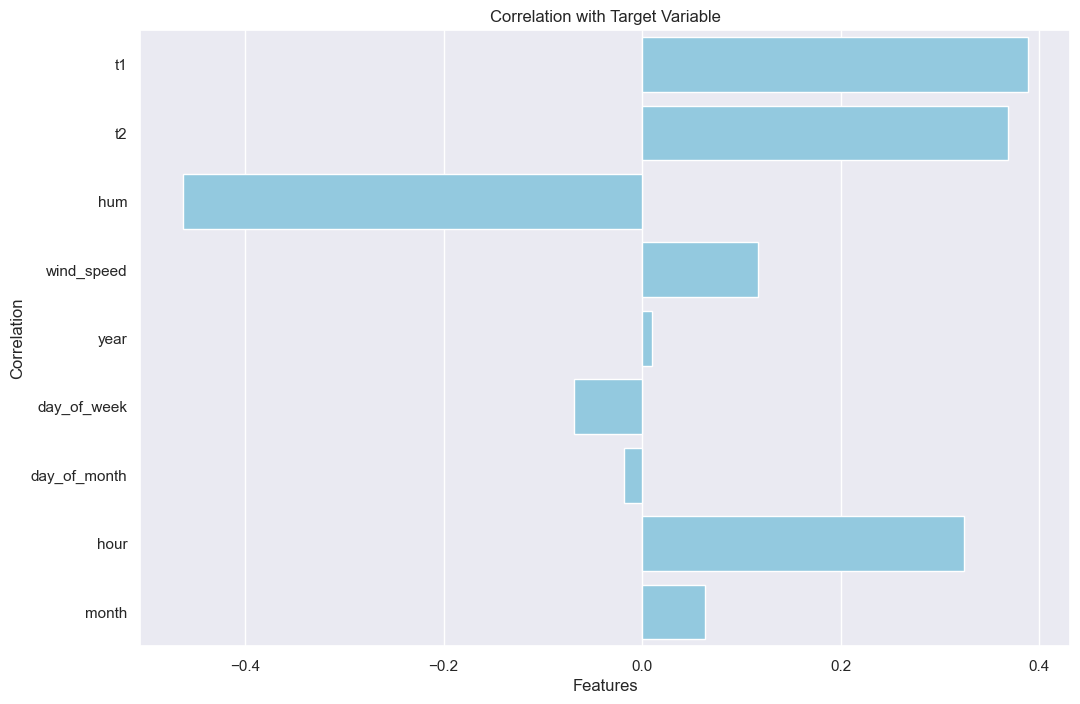

In [35]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y=correlation_with_target.index, x=correlation_with_target.values, color='skyblue')

# Customize the plot
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [38]:
target_corr = correlation_with_target.sort_values(ascending=False)

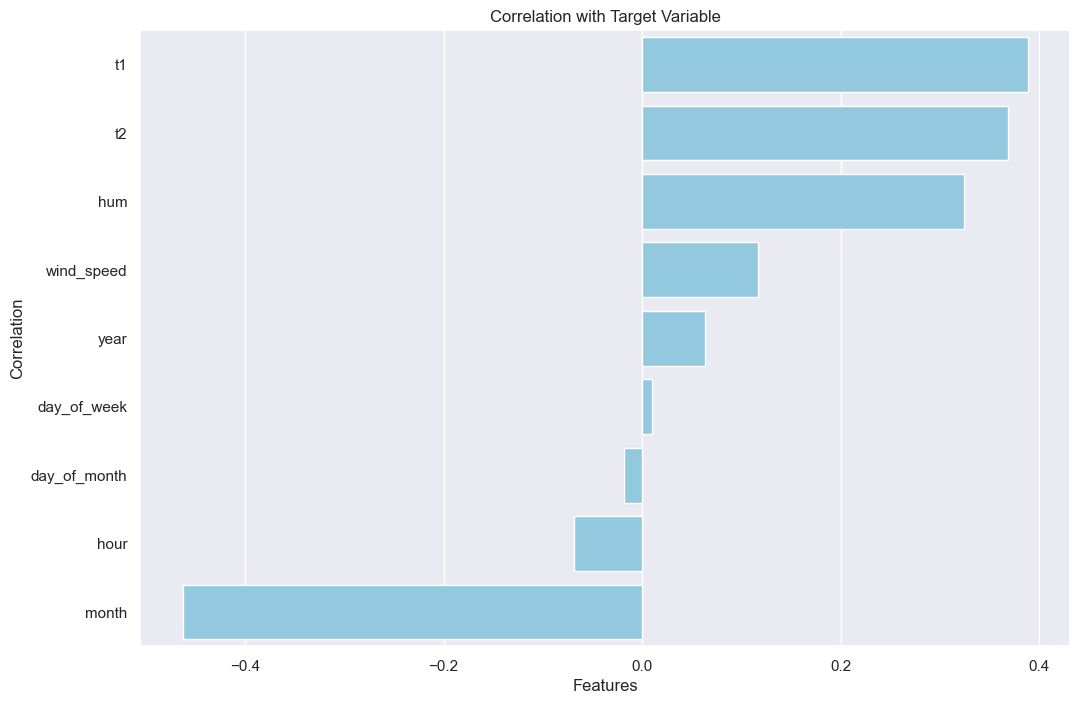

In [39]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y=correlation_with_target.index, x=target_corr.values, color='skyblue')

# Customize the plot
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot bike shares over time use lineplot.
</span>

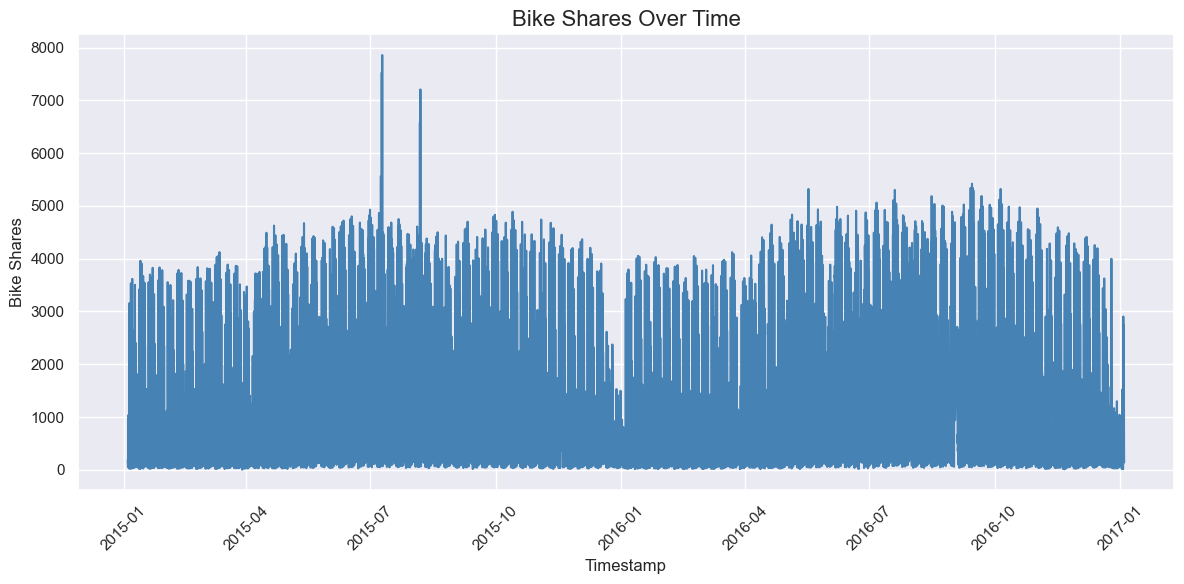

In [40]:
# Set the figure size and font size
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 12

# Plot the bike shares over time
sns.lineplot(data=df_bike, x='timestamp', y='cnt', color='steelblue')

# Set the title and axis labels
plt.title('Bike Shares Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Bike Shares', fontsize=12)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#During the summer of 2017, there were several days when the bike shares well exceeded the mean. 
#These exceptional days can be considered outliers.
#The start of 2016 marked the period with the lowest number of observed bike shares.

In [41]:
#let's try this lineplot seasonal and monthly.
#since the time is a daily value, the lineplot does not give a meaningful figure for the dataset

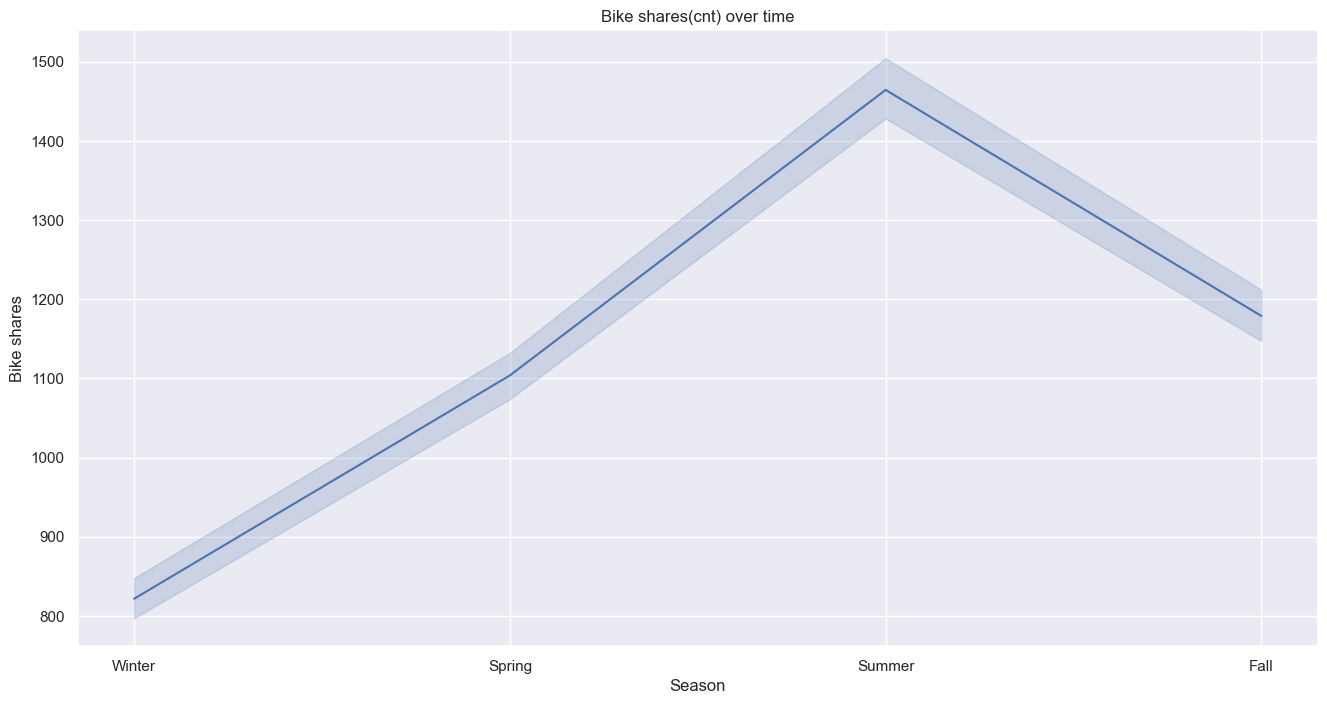

In [42]:
# by quarter

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=df_bike.season, y=df_bike.cnt, ax=ax)
ax.set_xlabel('Season')
ax.set_ylabel('Bike shares')
ax.set_title('Bike shares(cnt) over time')
ax.grid(True)
plt.show()

# the most bike share has been observed during the third quarter cumulatively in 2015 and 2016
#this is an expected result since it corresponds to summer time

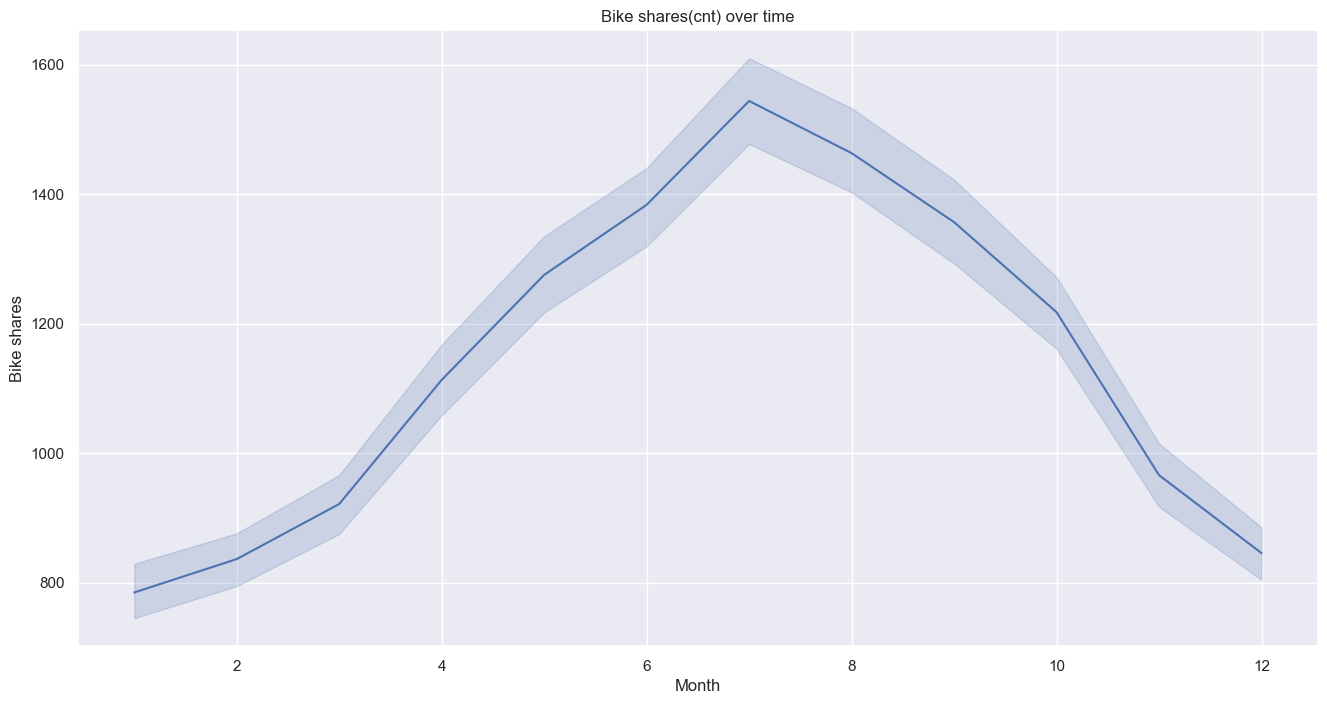

In [43]:
# by month

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=df_bike.month, y=df_bike.cnt, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Bike shares')
ax.set_title('Bike shares(cnt) over time')
ax.grid(True)
plt.show()

#From this monthly line graphic, it is more clear that the most bikes were rented during the summer period
#Since the beginning and the end of the year corresponds to the winter season, bike share considerably decreases
#A slightly left-skeweness can be observed from the graphic, 
#this can be because in London the beginning of the summer extends to July.

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [44]:
df_bike.head(1)

cnt   t1   t2   hum  wind_speed   weather_code   is_holiday  \
timestamp                                                                 
2015-01-04  182  3.0  2.0  93.0         6.0  Broken clouds  Non-holiday   

           is_weekend  season  year  day_of_week  day_of_month  hour  month  
timestamp                                                                    
2015-01-04    Weekend  Winter  2015            6             4     0      1

In [45]:
print(df_bike.index.year)
# we can simply call the year from the index column with df1.index.year
#Because before we set timestamp as index

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)


In [46]:
print(df_bike.index.month)
# we can simply call the month from the index column with df1.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='timestamp', length=17414)


In [47]:
df_bike['year_of_month'] = df_bike.index.year.astype(str) + '-' + df_bike.index.month.astype(str)
#In order to add "-" between year and month, we should transform their types into str
#By assigning the column, we can add a new feature called "year_of_month"

# Calculate the total bike shares per month and year_of_month
df_monthly = df_bike.groupby(['month', 'year_of_month'])['cnt'].sum().reset_index()

In [48]:
df_bike.head(1)

cnt   t1   t2   hum  wind_speed   weather_code   is_holiday  \
timestamp                                                                 
2015-01-04  182  3.0  2.0  93.0         6.0  Broken clouds  Non-holiday   

           is_weekend  season  year  day_of_week  day_of_month  hour  month  \
timestamp                                                                     
2015-01-04    Weekend  Winter  2015            6             4     0      1   

           year_of_month  
timestamp                 
2015-01-04        2015-1

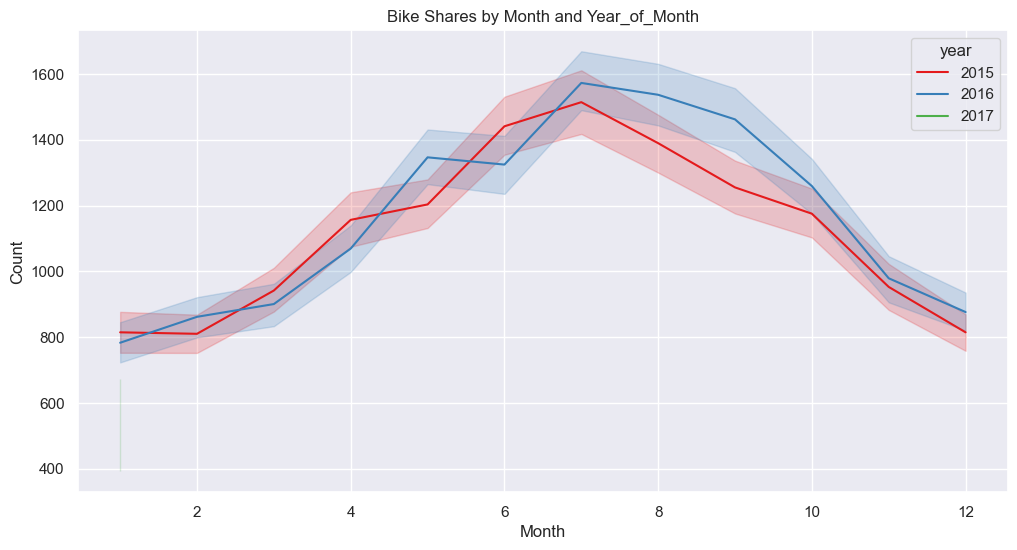

In [49]:
# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', hue='year', data=df_bike, palette='Set1')
plt.title('Bike Shares by Month and Year_of_Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()
#In the graph, the bike shares are represented as the sum of all years by month. 
#The results indicate that, overall, the highest number of bikes are rented during the high season, particularly in mid-summer.
#The least bike shares occur during the winter time, the graph that resembles a normal distribution. 
#However, a slight left-skewness can be observed in the data.

In [ ]:
# Create point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='cnt', hue='year', data=df_bike)
plt.title('Bike Shares by Month and Year_of_Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

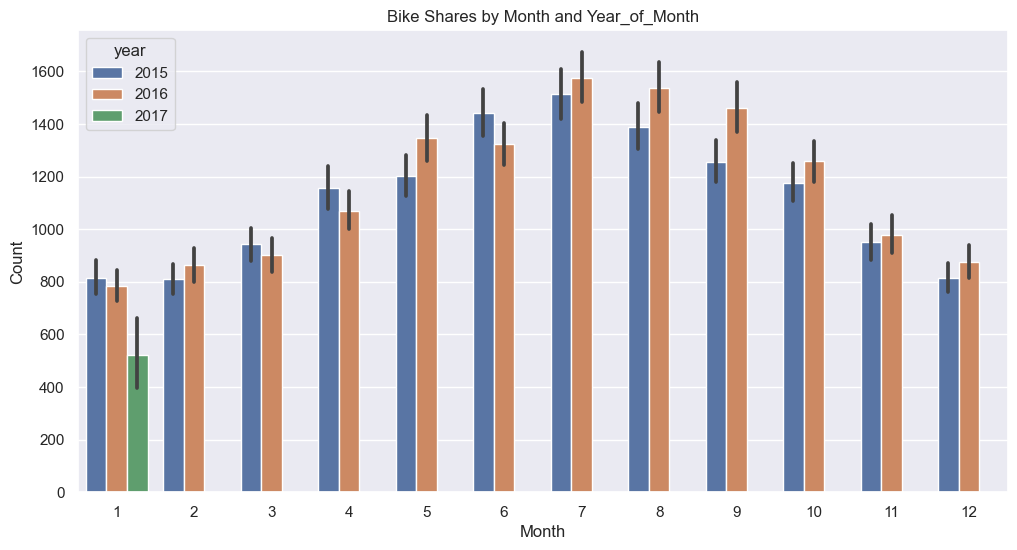

In [50]:
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', hue='year', data=df_bike)
plt.title('Bike Shares by Month and Year_of_Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

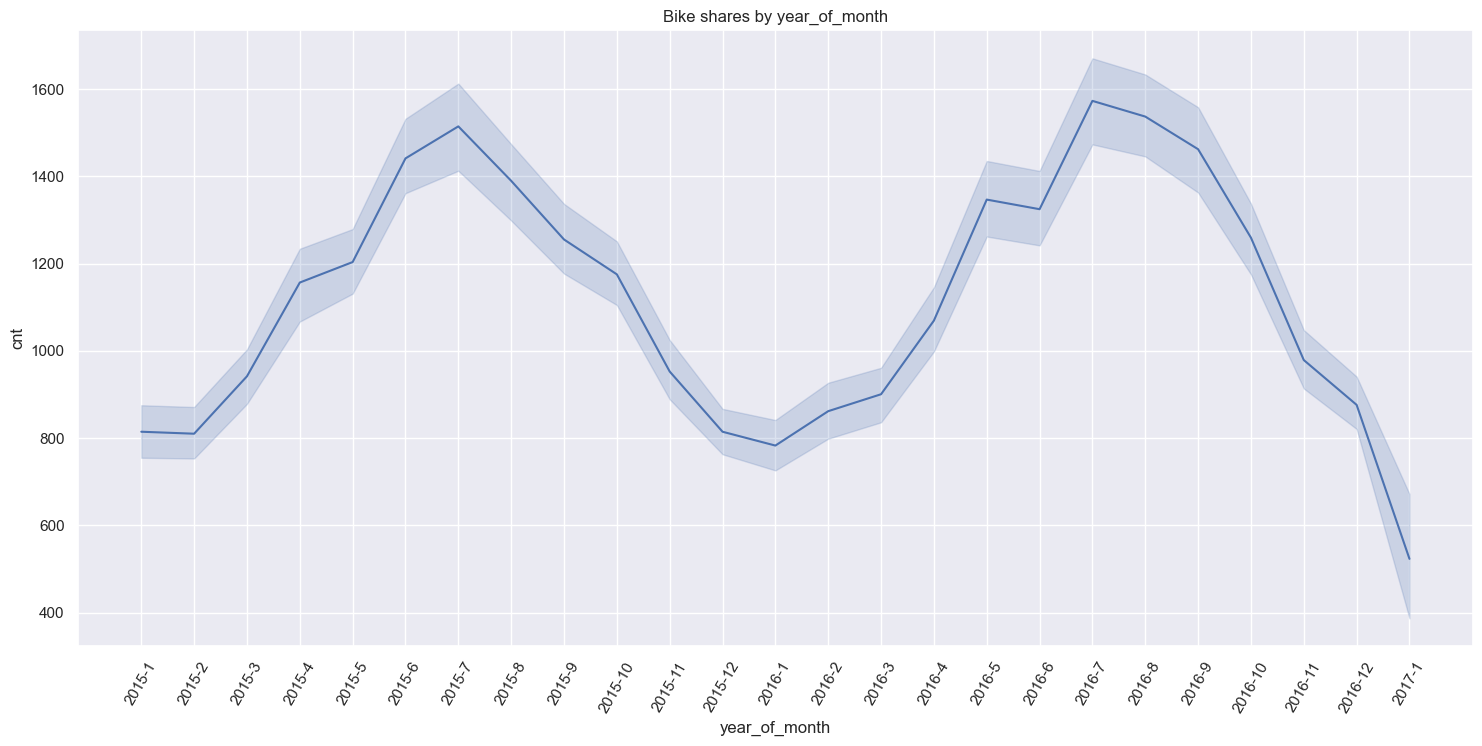

In [51]:
plt.figure(figsize = (18,8))
sns.lineplot(x = "year_of_month", y = "cnt", data = df_bike)
plt.title("Bike shares by year_of_month")
plt.xticks(rotation = 60)
plt.show()

#When plotting the same graph over the "year_of_month" feature, 
#we observe two peaks in the graph, corresponding to the summer seasons. 
#Additionally, from the graph, we can infer that the bike shares during the winter season of 2016-2017 
#are significantly lower, compared to the winter season of 2014-2015.

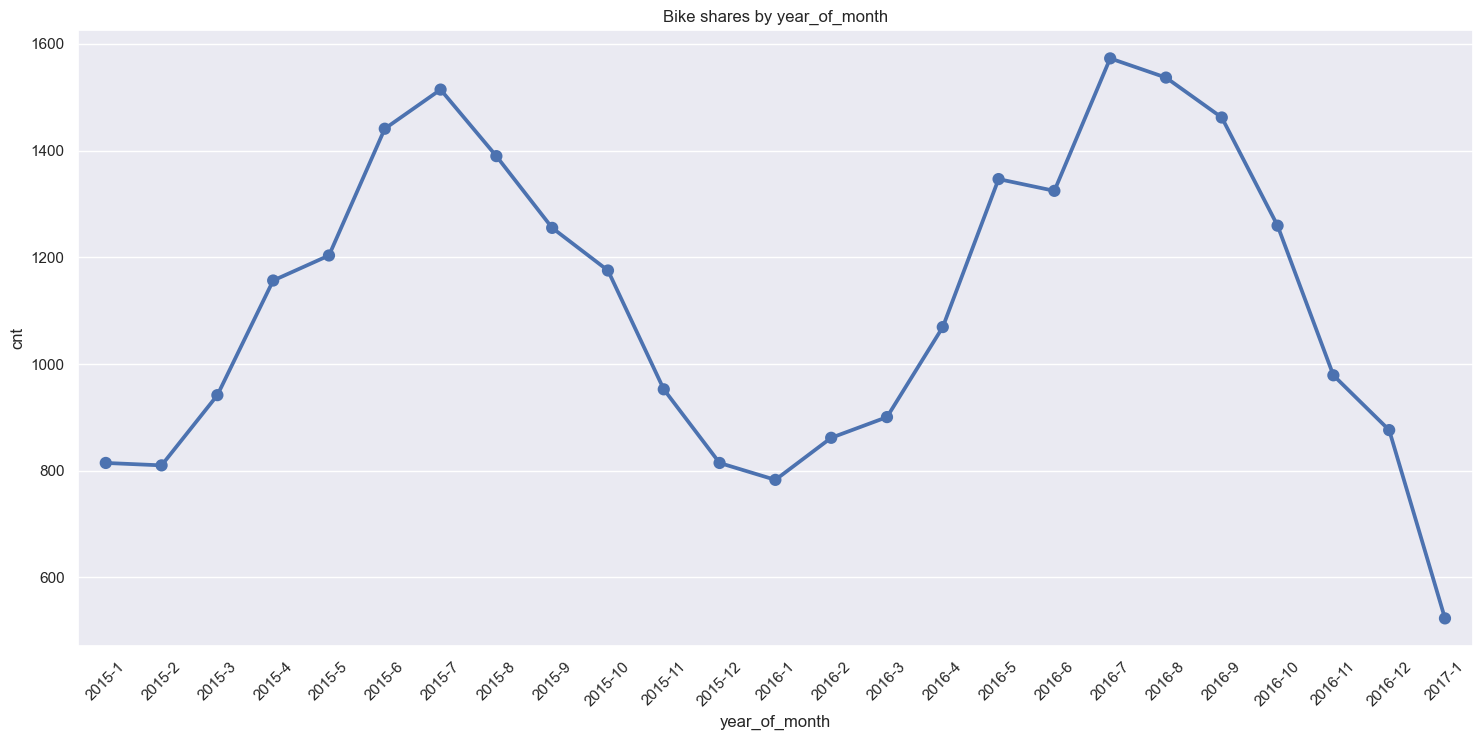

In [52]:
plt.figure(figsize = (18,8))
sns.pointplot(x = "year_of_month", y = "cnt", data = df_bike,errorbar = None)
plt.title("Bike shares by year_of_month")
plt.xticks(rotation = 45) 
plt.show()

# Here we also observe that July is the month when the most number of bike rentals are observed
#Maybe due to the severe winter conditions in January 2017, bike rentals consierably decreased

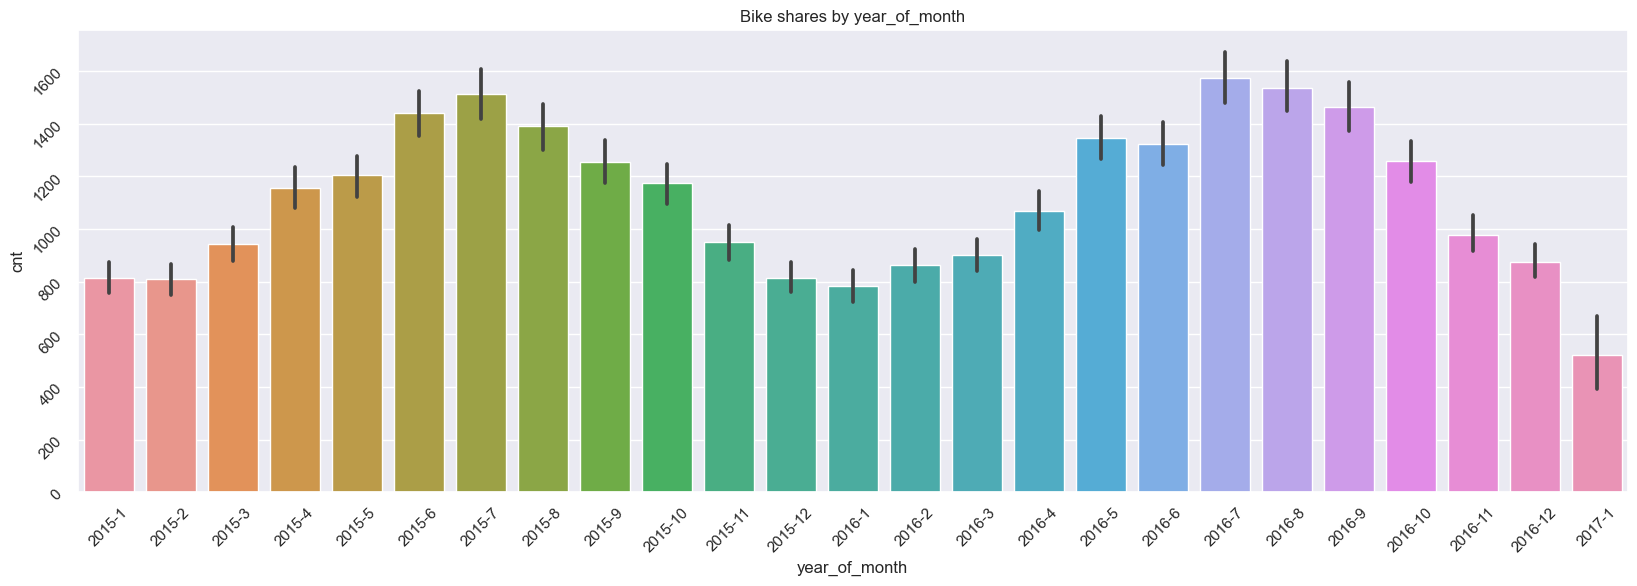

In [53]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x="year_of_month", y="cnt", data=df_bike, ax=ax)
ax.set_title("Bike shares by year_of_month")
ax.tick_params(rotation=45)
plt.show()


From the the barplot, we can easily observe the two peaks in the summer season in both 2015 and 2016 The ticks above the patches in the graphic represent the standard deviation. Based on the graphic, it can be observed that the standard deviation during the high season is higher compared to other seasons. This implies that there is greater variability or dispersion in the bike shares during the peak summer months compared to other times of the year.

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot bike shares by hours on (holidays, weekend, season).
</span>

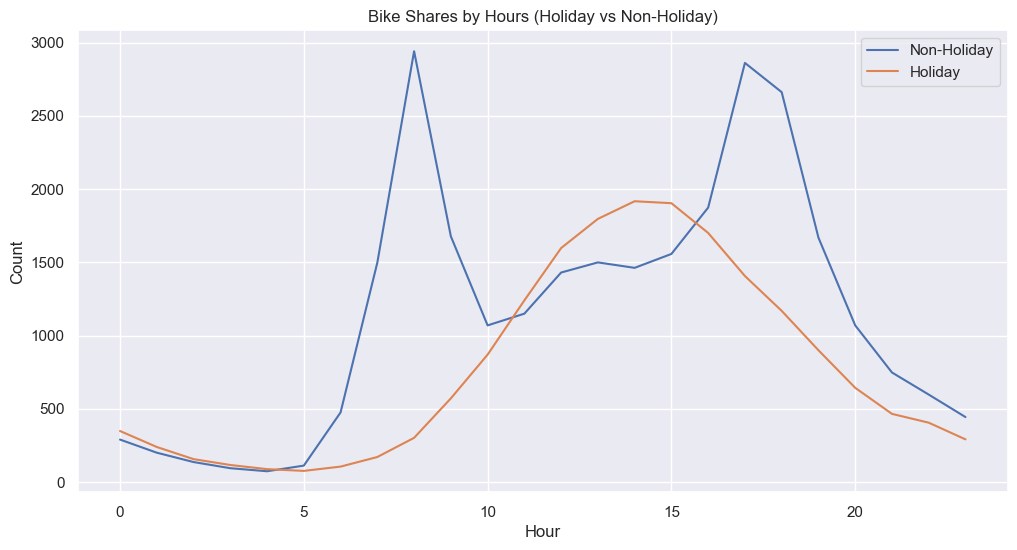

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', data=df_bike, hue='is_holiday', err_style=None)
plt.title('Bike Shares by Hours (Holiday vs Non-Holiday)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['Non-Holiday', 'Holiday'])
plt.show()

According to the graphic, we can infer that on regular days, the bike share increases during morning and evening hours. This suggests that people tend to use bikes when commuting to and from work. However, during holidays, the peak hours shift to the period between 14:00 and 16:00, indicating that bike rentals during this time are more for leisurely travel rather than commuting purposes.

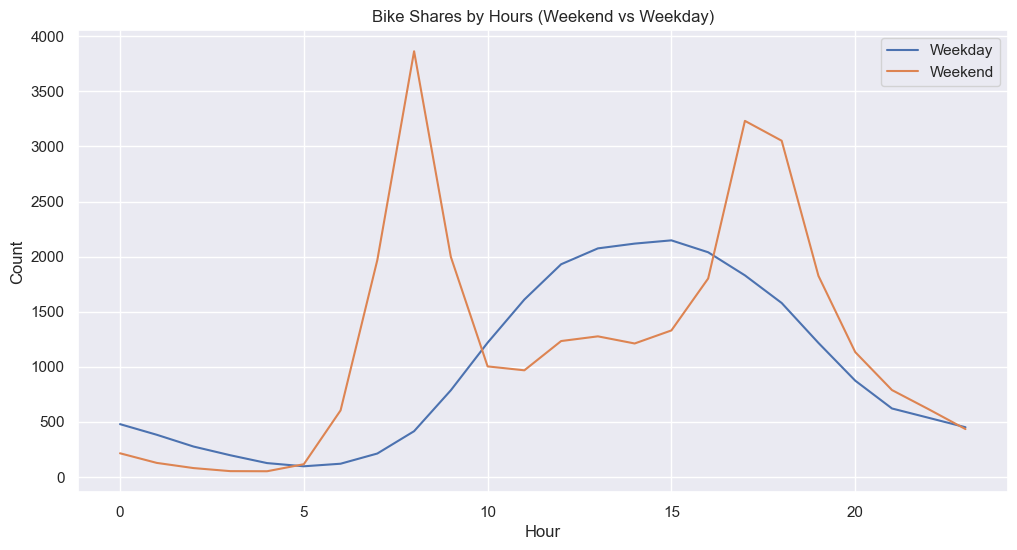

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', data=df_bike, hue='is_weekend', err_style=None)
plt.title('Bike Shares by Hours (Weekend vs Weekday)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['Weekday', 'Weekend'])
plt.show()

According to the graphic, similar to holiday or not insight, in weekdays the bike share increases during morning and evening hours. This suggests that people tend to use bikes when commuting to and from work. However, during weekend, the peak hours shift to the period between 14:00 and 16:00, indicating that bike rentals during this time are more for leisurely travel rather than commuting purposes.

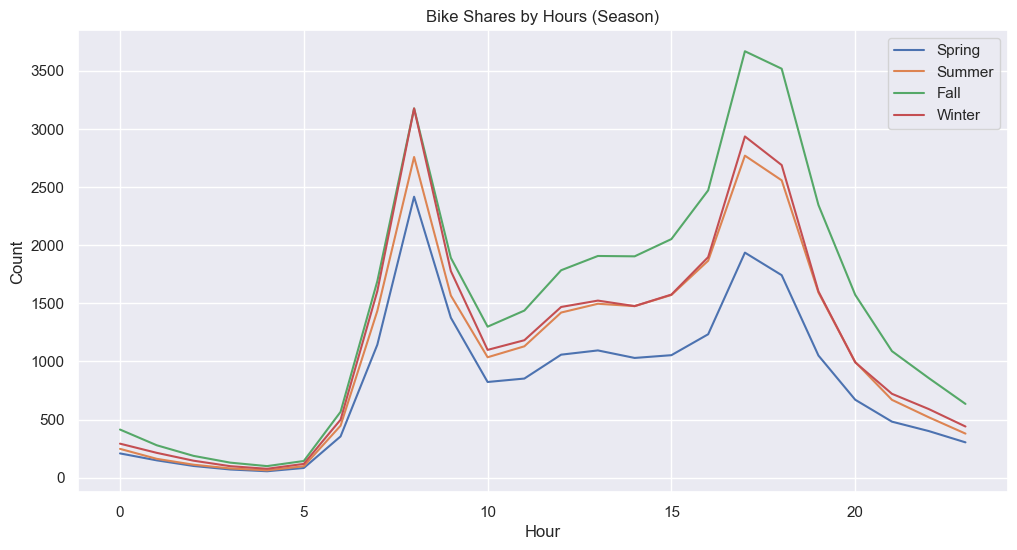

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', data=df_bike, hue='season', err_style=None)
plt.title('Bike Shares by Hours (Season)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

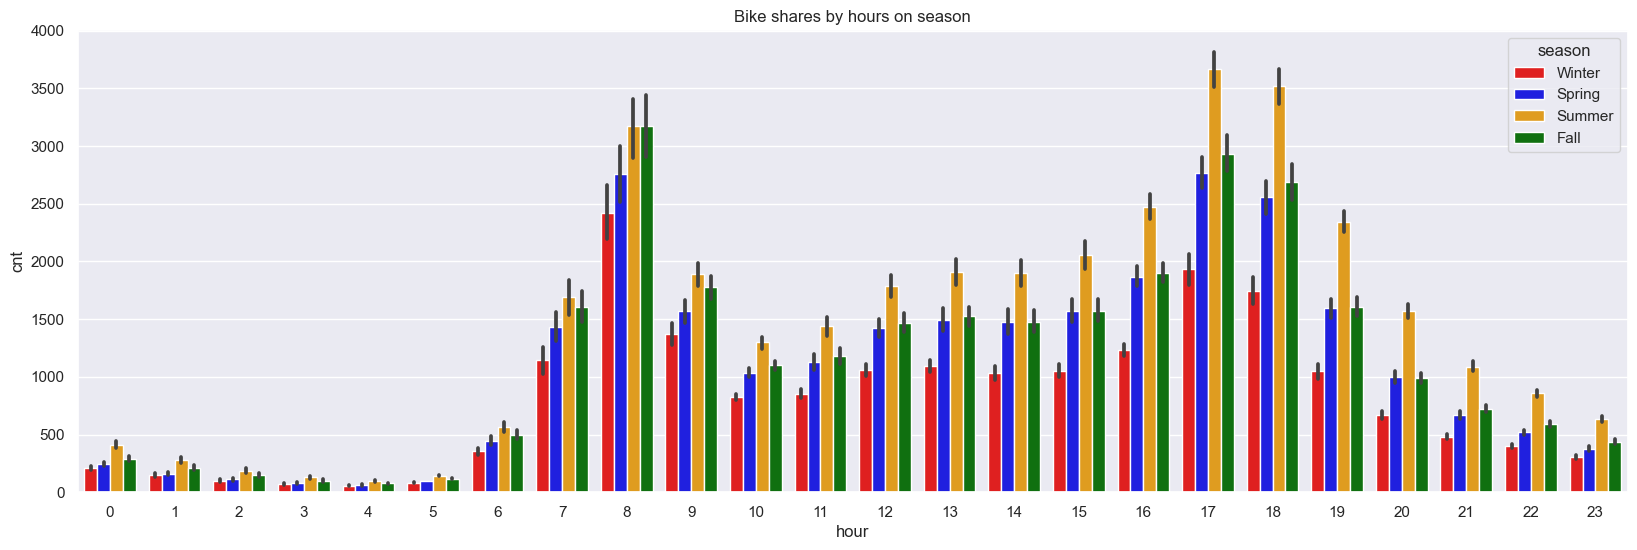

In [63]:
plt.figure(figsize=(20, 6))

season_colors = ["red","blue","orange","green"]

sns.barplot(x="hour", y="cnt", data=df_bike, hue="season", palette=season_colors)

plt.title("Bike shares by hours on season")
plt.show()

According to the graphic, we can infer that in each season, the bike share increases during morning and evening hours. This suggests that people tend to use bikes when commuting to and from work. the morning hours are intensified between 7-9 am the evening hours are intensified between 16:00 and 18:00. it shows us the domination of IT sector :)

<div class="alert alert-warning alert-info">
<span style=" color:red"> Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

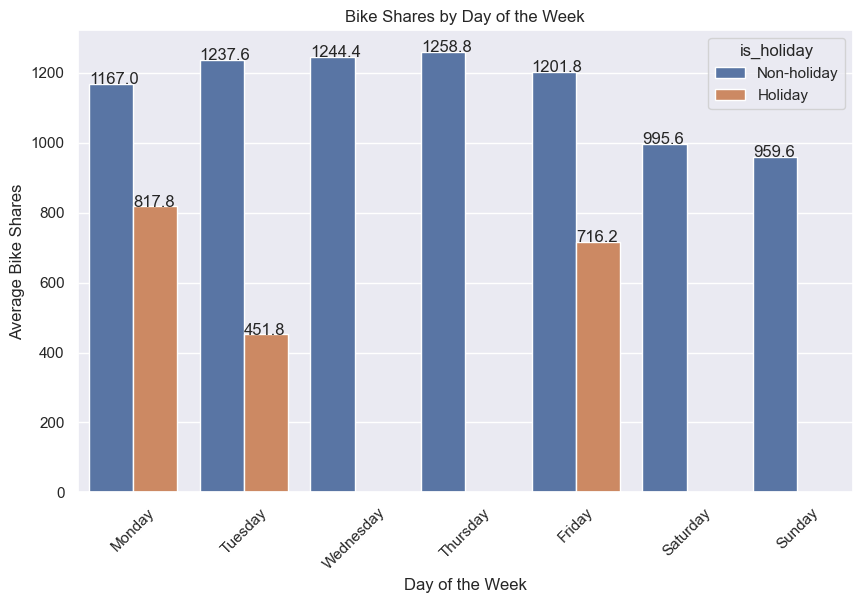

In [78]:
# Map the day of the week labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_bike, x='day_of_week', y='cnt', ci = False, hue='is_holiday')
plt.title('Bike Shares by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bike Shares')
plt.xticks(range(7), day_labels, rotation=45)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
    
plt.show()

Since the weekends are already considered holidays, the "is_holiday" variable only determines weekdays as categorical data. When holidays fall on Mondays or Fridays, bike rentals increase. One possible insight that can be derived from this is that people may take advantage of long weekends to visit London. Based on the graph, it appears that if the holiday falls on a Wednesday or Thursday, it does not significantly affect bike sharing.

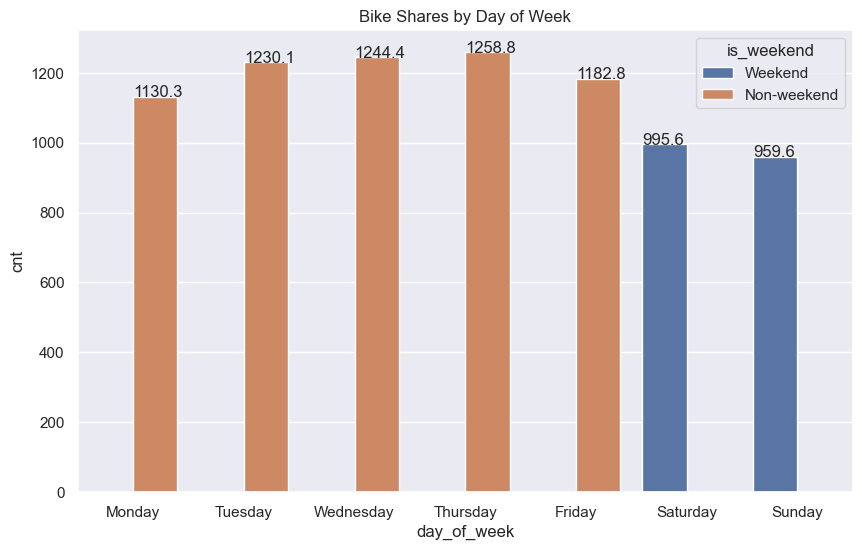

In [76]:
# Map the day of the week labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_bike, x="day_of_week", y="cnt", hue="is_weekend", ci=False)
plt.title("Bike Shares by Day of Week")
plt.xticks(range(7), day_labels)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

The bike rental rates for the weekends, specifically Saturdays and Sundays, are very close to each other but lower than those of weekdays. From this, one possible conclusion that can be drawn is that people prefer to relax at home rather than renting bikes during the weekends, or they may primarily use bikes for commuting purposes during the weekdays.

<div class="alert alert-warning alert-info">
<span style=" color:red"> Plot bike shares by day of month
</span>

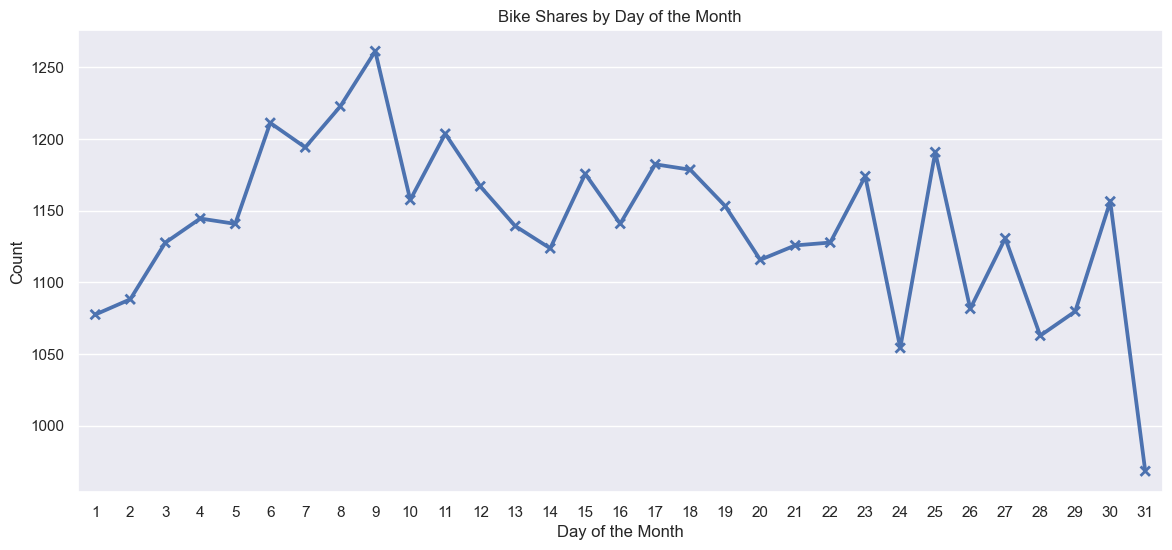

In [84]:
# Group the data by day of the month
grouped = df_bike.groupby('day_of_month', as_index=False)['cnt'].mean()

# Plot bike shares by day of the month
plt.figure(figsize=(14, 6))
sns.pointplot(data=df_bike, x='day_of_month', y='cnt', markers = "x",errorbar = None)
plt.title('Bike Shares by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')

plt.show()

It may not be possible to draw highly significant conclusions from this, but it can be observed that the bike share increases during the first nine days of the month and fluctuates afterward. The reason for the lowest bike share on the 24th day of the month could be attributed to Christmas, as people spend time with their families rather than renting bikes for leisurely activities. Similarly, the lower bike share on the 31st day of the month could be due to the varying lengths of different months, with some having 30 days and others having 31.

<div class="alert alert-warning alert-info">
<span style=" color:red"> Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

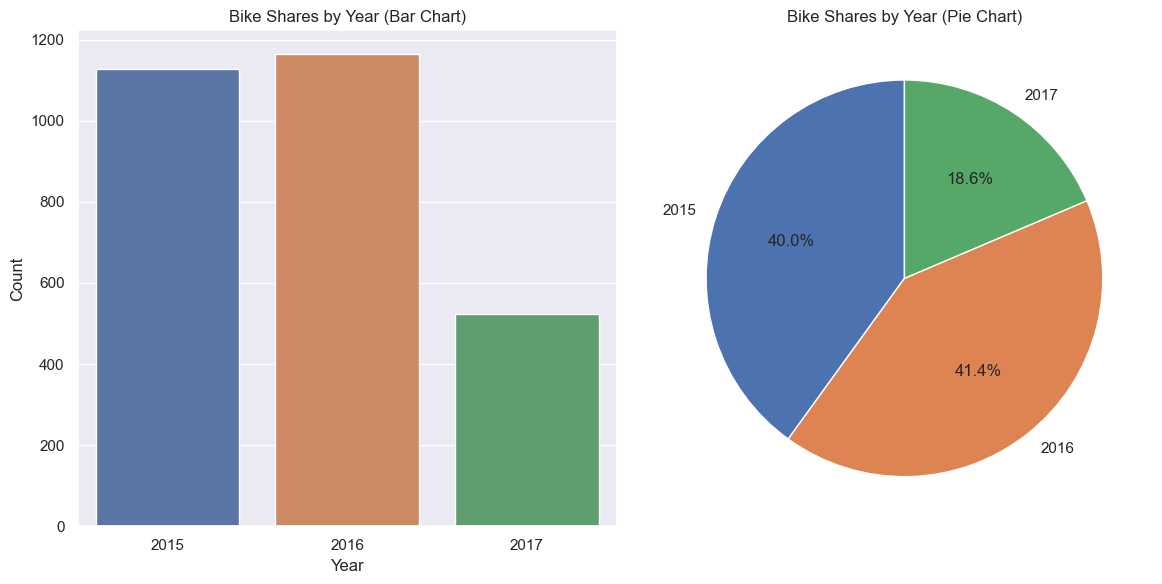

In [27]:
# Group the data by year
grouped = df_bike.groupby('year', as_index=False)['cnt'].mean()

# Calculate the total bike shares for each year
total_shares = grouped['cnt'].sum()

# Calculate the percentage of bike shares for each year
grouped['percentage'] = grouped['cnt'] / total_shares * 100

# Plot bike shares by year using Bar Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for Bar Chart
sns.barplot(data=grouped, x='year', y='cnt')
plt.title('Bike Shares by Year (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Count')

# Plot bike shares by year using Pie Chart
plt.subplot(1, 2, 2)  # Subplot for Pie Chart
plt.pie(grouped['percentage'], labels=grouped['year'], autopct='%1.1f%%', startangle=90)
plt.title('Bike Shares by Year (Pie Chart)')

plt.tight_layout()
plt.show()

In 2016, the bike share has slightly increased compared to 2015. However, the reason for 2017 appearing significantly lower is due to the availability of data only for January in 2017.

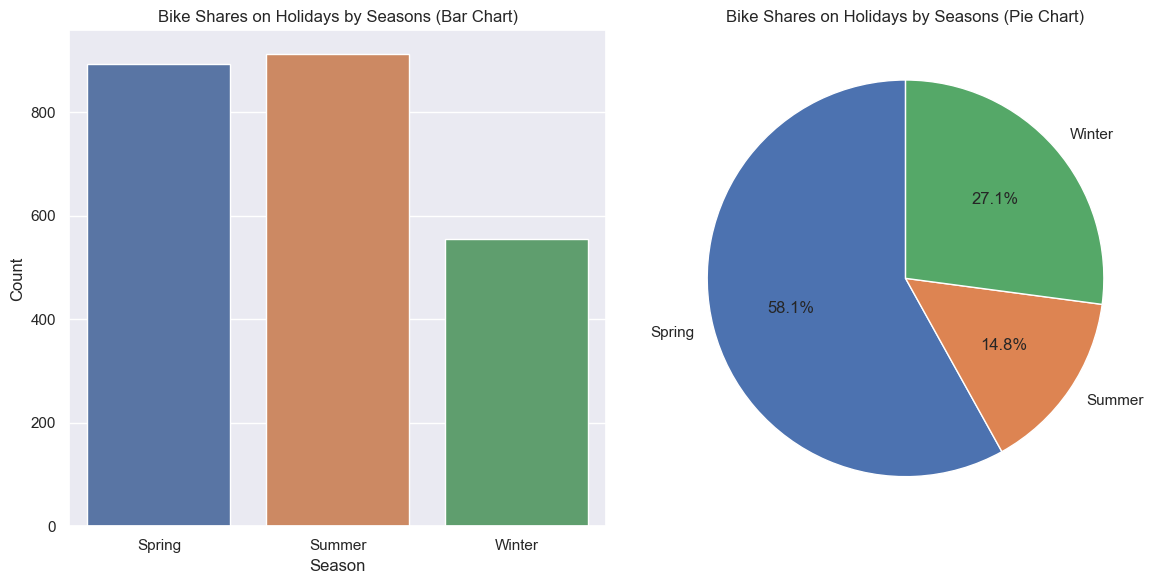

In [28]:
# Filter the data for holidays
holidays_data = df_bike[df_bike['is_holiday'] == 1]

# Group the data by season
grouped = holidays_data.groupby('season', as_index=False)['cnt'].mean()

# Plot bike shares on holidays by seasons using Bar Chart
plt.figure(figsize=(12, 6))

# Bar Chart
plt.subplot(1, 2, 1)
sns.barplot(data=grouped, x='season', y='cnt')
plt.title('Bike Shares on Holidays by Seasons (Bar Chart)')
plt.xlabel('Season')
plt.ylabel('Count')

# Filter the data for holidays
holidays_data = df_bike[df_bike['is_holiday'] == 1]

# Group the data by season
grouped = holidays_data.groupby('season', as_index=False)['cnt'].sum()

# Plot bike shares on holidays by seasons using Pie Chart
plt.subplot(1, 2, 2)

# Pie Chart
plt.pie(grouped['cnt'], labels=grouped['season'], autopct='%1.1f%%', startangle=90)
plt.title('Bike Shares on Holidays by Seasons (Pie Chart)')

plt.tight_layout()
plt.show();

If holidays fall during the autumn season, very few bikes are rented. This is most likely due to Thanksgiving coinciding with the autumn season, resulting in fewer bike rentals during that time.

Furthermore, people have preferred to rent bikes more during the summer.

<div class="alert alert-warning alert-info">
<span style=" color:red">Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [85]:
# Group the data by is_weekend
grouped = df_bike.groupby('is_weekend', as_index=False)['cnt'].sum()
grouped

is_weekend       cnt
0  Non-weekend  15048216
1      Weekend   4857756

In [86]:
grouped.value_counts().index

MultiIndex([('Non-weekend', 15048216),
            (    'Weekend',  4857756)],
           names=['is_weekend', 'cnt'])

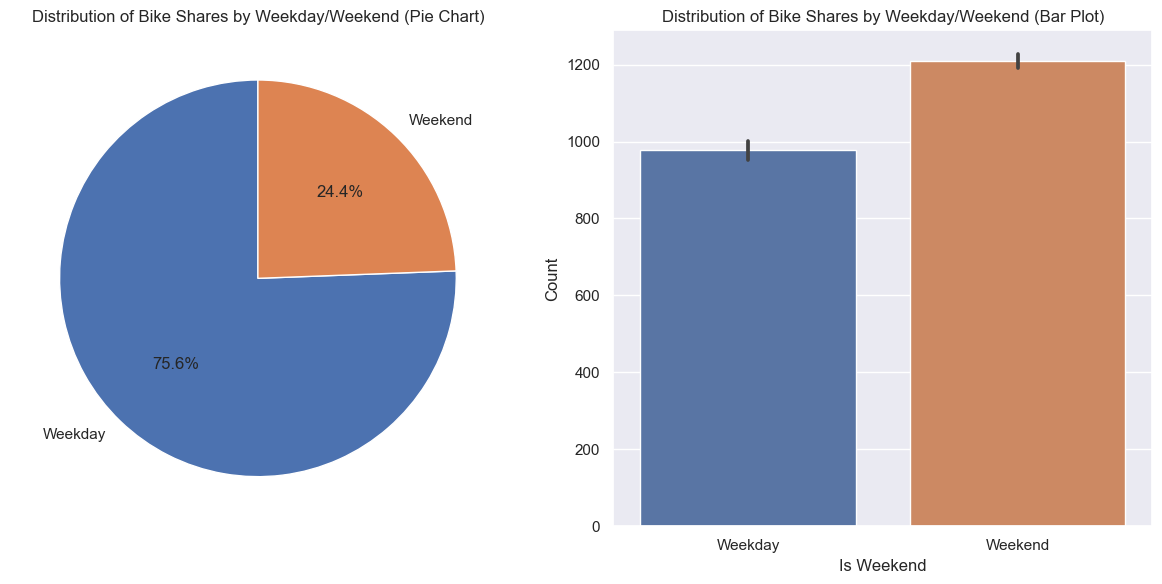

In [87]:
# Define labels for pie chart
labels = ['Weekday', 'Weekend']

# Plot pie chart
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(grouped['cnt'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend (Pie Chart)')

# Plot bar plot
plt.subplot(1, 2, 2)
sns.barplot(data=df_bike, x='is_weekend', y='cnt')
plt.title('Distribution of Bike Shares by Weekday/Weekend (Bar Plot)')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], ['Weekday', 'Weekend'])

plt.tight_layout()
plt.show()

Daha önceki grafiklerde belirtildiği gibi, insanların büyük olasılıkla işe gidip gelmek amacıyla hafta içi günlerde daha fazla bisiklet kiralama eğiliminde oldukları sonucuna varılabilir.

<div class="alert alert-warning alert-info">
<span style=" color:red">Plot the distribution of weather code by seasons
</span>

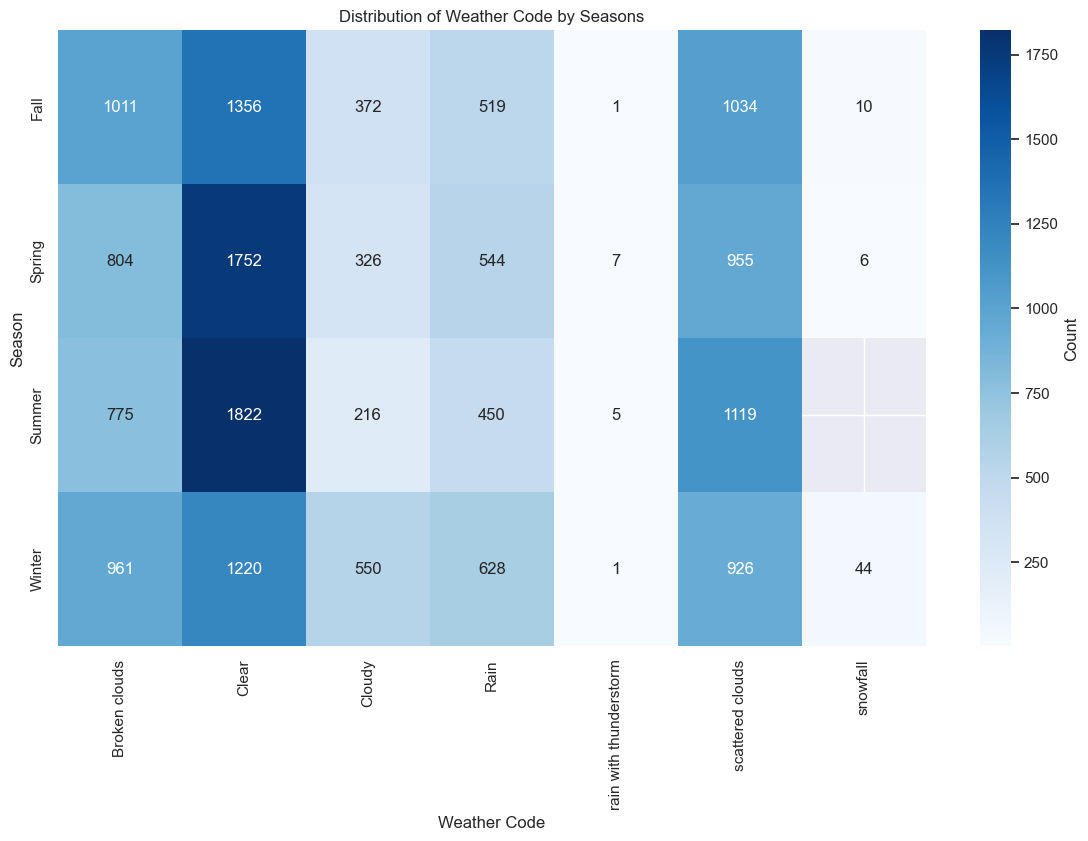

In [96]:
# Group the data by season and weather code, and calculate counts
grouped = df_bike.groupby(['season', 'weather_code'], as_index=False)['cnt'].count()

# Plot the distribution of weather code by seasons
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', cbar=True, cbar_kws={'label': 'Count'})
plt.title('Distribution of Weather Code by Seasons')
plt.xlabel('Weather Code')
plt.ylabel('Season')

plt.show()

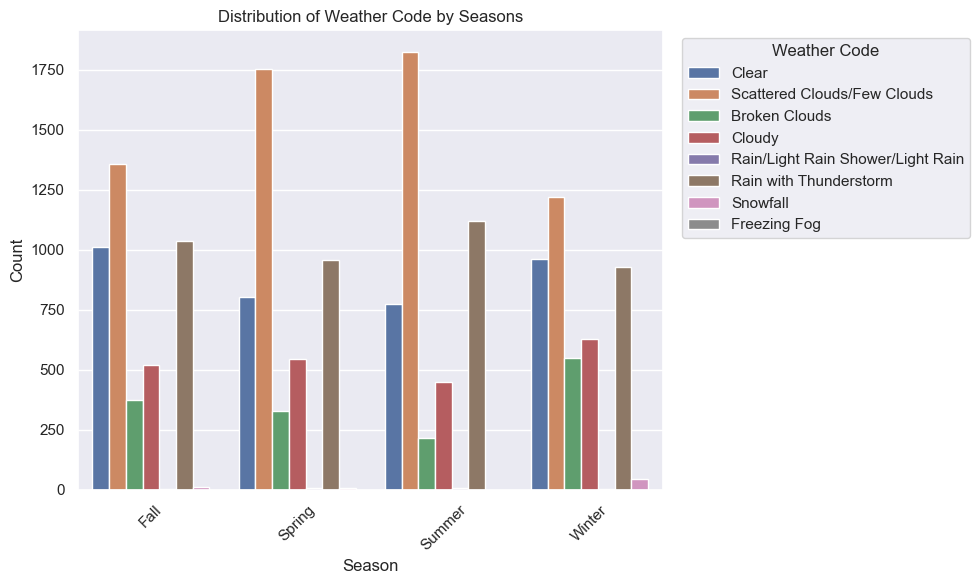

In [101]:

# Group the data by season and weather code, and calculate counts
grouped = df_bike.groupby(['season', 'weather_code'], as_index=False)['cnt'].count()

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='season', y='cnt', hue='weather_code')
plt.title('Distribution of Weather Code by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Move the legend outside the plot
plt.legend(legend_handles, legend_labels, title='Weather Code', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

People tend to prefer renting bikes more during the summer, especially on days with scattered clouds or broken clouds. One possible reason for this could be that on sunny days, they may opt for other transportation options such as the metro or car to avoid sweating during their commute. However, even on clear days, the bike rental rate is higher compared to rainy, snowy, or freezing days.

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

The results show that overall the highest number of bikes are rented during the summer season, especially mid-summer.

1. It is used more on workdays rather than holidays, which can show that it is an alternative solution for people who want to avoid traffic and the project has been successful.
2. Lower use in winter
3. The usage rate is higher during commuting hours, and the usage rate is higher on weekdays (working days)